In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import matplotlib.colors as mcolors
import sys
import geopandas as gpd
coastline = gpd.read_file('~/storage/VECTORIAL/cl_continental_geo.shp')
sys.path.append('../')
from utils import croco_sellonlatbox

---

# Rivers positions RUND0

In [2]:
rund0grid = xr.open_dataset('/home/lucasg/storage/SEQUIA/crocod0_grd.nc').load()
rund0grid.coords['lat_rho'] = rund0grid.lat_rho
rund0grid.coords['lon_rho'] = rund0grid.lon_rho
rund0grid

<xarray.Dataset>
Dimensions:    (one: 1, eta_rho: 252, xi_rho: 152, bath: 1, eta_u: 252,
                xi_u: 151, eta_v: 251, xi_v: 152, eta_psi: 251, xi_psi: 151)
Coordinates:
    lon_rho    (eta_rho, xi_rho) float64 285.0 285.0 285.1 ... 289.1 289.2 289.2
    lat_rho    (eta_rho, xi_rho) float64 -33.5 -33.5 -33.5 ... -27.5 -27.5 -27.5
Dimensions without coordinates: one, eta_rho, xi_rho, bath, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/32)
    xl         (one) float64 9.969e+36
    el         (one) float64 9.969e+36
    depthmin   (one) float64 9.969e+36
    depthmax   (one) float64 9.969e+36
    spherical  (one) |S1 b'T'
    angle      (eta_rho, xi_rho) float64 -0.0001338 -0.0001338 ... -0.0001119
    ...         ...
    lat_v      (eta_v, xi_v) float64 -33.49 -33.49 -33.49 ... -27.51 -27.51
    lat_psi    (eta_psi, xi_psi) float64 -33.49 -33.49 -33.49 ... -27.51 -27.51
    mask_rho   (eta_rho, xi_rho) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    mask_u     (eta_u, xi_u) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0 0.0
    mask_v     (eta_v, xi_v) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0 0.0
    mask_psi   (eta_psi, xi_psi) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:    DESALADORAS_D0
    date:     08-Mar-2023
    type:     CROCO grid file

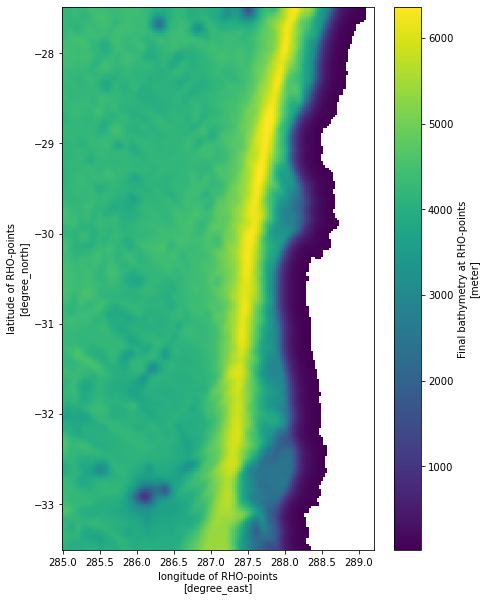

In [3]:
rund0grid.h.where(rund0grid.mask_rho).plot(figsize=(7,10), x='lon_rho', y='lat_rho')

In [4]:
r1 = (-30,360-71.4168) #panul
# r1 = (-29.489,360-71.326) #totoralillo norte
# r1 = (-31.892,360-71.506) #losivlos
latp,lonp = rund0grid.lat_psi, rund0grid.lon_psi
poslat = np.min(np.where((latp[:,0]>=r1[0]-1/36)&(latp[:,0]<=r1[0]+1/36))[0])
poslon = np.min(np.where(lonp[poslat,:]-r1[1]>0)[0])
print(poslat,poslon)

147 129


---

## Rivers positions RUND1

In [3]:
rund1grid = xr.open_dataset('/home/lucasg/storage/SEQUIA/crocod1_grd.nc').load()
rund1grid.coords['lat_rho'] = rund1grid.lat_rho
rund1grid.coords['lon_rho'] = rund1grid.lon_rho
rund1grid

<xarray.Dataset>
Dimensions:    (one: 1, eta_rho: 566, xi_rho: 152, bath: 1, eta_u: 566,
                xi_u: 151, eta_v: 565, xi_v: 152, eta_psi: 565, xi_psi: 151)
Coordinates:
    lon_rho    (eta_rho, xi_rho) float64 287.5 287.5 287.5 ... 288.9 288.9 288.9
    lat_rho    (eta_rho, xi_rho) float64 -32.7 -32.7 -32.7 ... -28.19 -28.19
Dimensions without coordinates: one, eta_rho, xi_rho, bath, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/32)
    xl         (one) float64 9.969e+36
    el         (one) float64 9.969e+36
    depthmin   (one) float64 9.969e+36
    depthmax   (one) float64 9.969e+36
    spherical  (one) |S1 b'T'
    angle      (eta_rho, xi_rho) float64 -4.365e-05 -4.365e-05 ... -3.817e-05
    ...         ...
    lat_v      (eta_v, xi_v) float64 -32.7 -32.7 -32.7 ... -28.2 -28.2 -28.2
    lat_psi    (eta_psi, xi_psi) float64 -32.7 -32.7 -32.7 ... -28.2 -28.2 -28.2
    mask_rho   (eta_rho, xi_rho) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    mask_u     (eta_u, xi_u) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    mask_v     (eta_v, xi_v) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    mask_psi   (eta_psi, xi_psi) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:    DESALADORAS_D0
    date:     09-Mar-2023
    type:     CROCO grid file

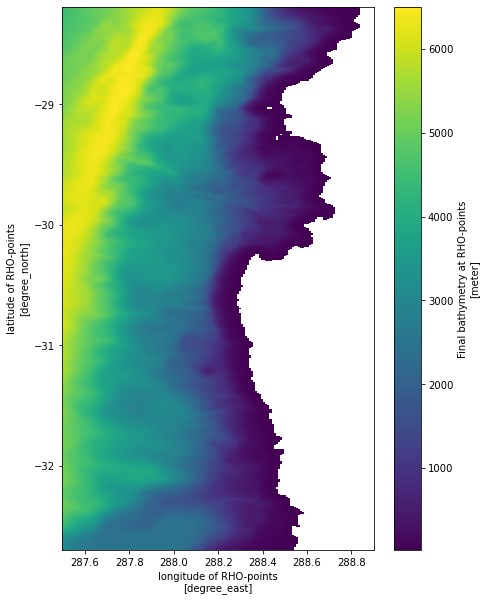

In [6]:
rund1grid.h.where(rund1grid.mask_rho).plot(figsize=(7,10), x='lon_rho', y='lat_rho')

In [7]:
# r1 = (-30,360-71.4168) #panul
# r1 = (-29.489,360-71.326) #totoralillo norte
r1 = (-31.892,360-71.506) #losivlos
latp,lonp = rund1grid.lat_psi, rund1grid.lon_psi
poslat = np.min(np.where((latp[:,0]>=r1[0]-1/36/3)&(latp[:,0]<=r1[0]+1/36/3))[0])
poslon = np.min(np.where(lonp[poslat,:]-r1[1]>0)[0])
print(poslat,poslon)

102 107


---

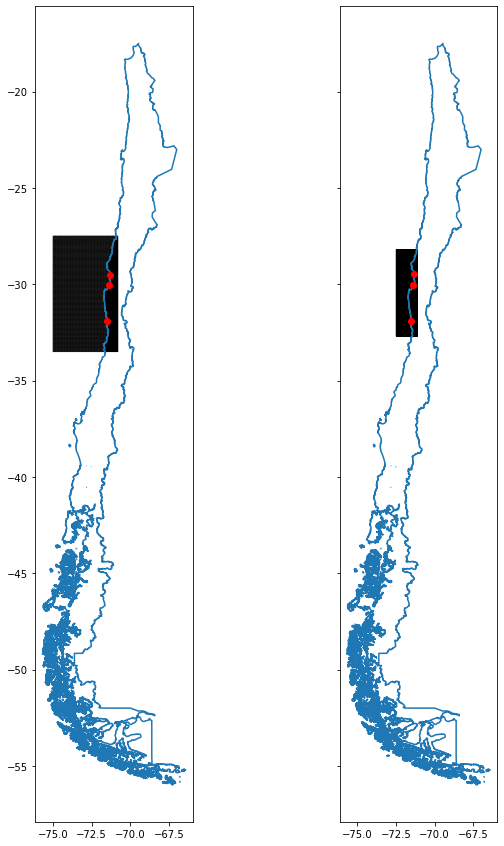

In [13]:
fig,ax = plt.subplots(1,2, figsize=(10,15), sharex=True,sharey=True)


for axis in ax.ravel():
    coastline.boundary.plot(ax=axis, color='tab:blue')    
    axis.set_xlim(-71.4,-71.2)
    axis.set_ylim(-29.55,-29.45)

ax[0].pcolormesh(rund0grid.lon_rho-360, rund0grid.lat_rho, rund0grid.mask_rho, alpha=1, cmap='hot')
ax[0].pcolor(rund0grid.lon_rho-360, rund0grid.lat_rho, rund0grid.mask_rho, facecolor='none', edgecolor='k')
ax[0].scatter(rund0grid.lon_u[147,129]-360,rund0grid.lat_u[147,129], color='red',zorder=3) # Panul
ax[0].scatter(rund0grid.lon_v[168,132]-360,rund0grid.lat_v[168,132], color='red',zorder=3) # Totoralillo norte
ax[0].scatter(rund0grid.lon_u[68,125]-360,rund0grid.lat_u[68,125], color='red',zorder=3)   # Los Vilos

ax[1].pcolormesh(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, alpha=1, cmap='hot')
ax[1].pcolor(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, facecolor='none', edgecolor='k')



ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=340,xi_rho=117)-360,rund1grid.lat_rho.sel(eta_rho=340,xi_rho=117), color='red',zorder=3)   # Panul
ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=405,xi_rho=126)-360,rund1grid.lat_rho.sel(eta_rho=405,xi_rho=126), color='red',zorder=3)   # Totoralillo norte
ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=104,xi_rho=107)-360,rund1grid.lat_rho.sel(eta_rho=104,xi_rho=107), color='red',zorder=3)   # Los Vilos




#PARAMETERS TO crocod0_inter.in
# psource:   Nsrc  Isrc  Jsrc  Dsrc  Qbar [m3/s]    Lsrc        Tsrc
#             3
# 		  130   147     0   -1.3333            F T      20. 60.
# 		  132   169     1    1.3333            F T      20. 60.
# 		  126    68     0   -1.3333            F T      20. 60.



#PARAMETERS TO crocod1_inter.in
# psource:   Nsrc  Isrc  Jsrc  Dsrc  Qbar [m3/s]    Lsrc        Tsrc
#             3
# 		  118   340     0   -1.3333            F T      20. 60.
# 		  126   405     0   -1.3333            F T      20. 60.
# 		  108   104     1    1.3333            F T      20. 60.